In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from PIL import Image
import os 
from sklearn.model_selection import train_test_split

In [3]:
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join('archive', 'Train', str(i))
    images = os.listdir(path)
    
    for a in images:
      try: 
        image = Image.open(path + '\\' + a)
        image = image.resize((30, 30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
      except : 
        print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [4]:
labels.shape

(39209,)

In [5]:
data.shape

(39209, 30, 30, 3)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state = 42)

In [7]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
import cv2
# converting the RGB to Gray scale 
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
#eqaulize the intensity of the image
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [9]:
x_train = np.array(list(map(preprocessing, x_train)))

In [10]:
x_train.shape

(31367, 30, 30)

In [11]:
x_test = np.array(list(map(preprocessing, x_test)))

In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
#applies data augemenation on the dataset 
dataGen = ImageDataGenerator(width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            zoom_range = 0.2,
                            shear_range = 0.1,
                            rotation_range = 10)

In [15]:
dataGen.fit(x_train)

In [16]:
batches = dataGen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)

In [17]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
imageDimension = (30,30,3)
def myModel():
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(60, (5,5), input_shape =(imageDimension[0], imageDimension[1], 1), activation = 'relu'))
    model.add((tf.keras.layers.Conv2D(60, (5,5), activation = 'relu')))
    model.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))
    
    model.add((tf.keras.layers.Conv2D(30, (3,3), activation = 'relu')))
    model.add((tf.keras.layers.Conv2D(30, (3,3), activation= 'relu')))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(0.5))
              
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(500, activation= 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(43, activation = 'softmax'))
    model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])
    return model
        

In [19]:
mymodel = myModel()
print(mymodel.summary())
history = mymodel.fit_generator(dataGen.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train)//32, epochs = 10, validation_data = (x_train, y_train), shuffle = 1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 30)          16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 30)          0         
 g2D)                                                 

C:\Users\Hardik Chaudhary\AppData\Local\Temp\ipykernel_19152\646529543.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mymodel.fit_generator(dataGen.flow(x_train, y_train, batch_size = 32), steps_per_epoch = len(x_train)//32, epochs = 10, validation_data = (x_train, y_train), shuffle = 1)


Epoch 1/10


980/980 [==============================] - 82s 79ms/step - loss: 2.1387 - accuracy: 0.3889 - val_loss: 0.5625 - val_accuracy: 0.8466
Epoch 2/10
980/980 [==============================] - 77s 79ms/step - loss: 0.9687 - accuracy: 0.7026 - val_loss: 0.2489 - val_accuracy: 0.9258
Epoch 3/10
980/980 [==============================] - 81s 83ms/step - loss: 0.6755 - accuracy: 0.7924 - val_loss: 0.1335 - val_accuracy: 0.9626
Epoch 4/10
980/980 [==============================] - 81s 83ms/step - loss: 0.5361 - accuracy: 0.8350 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 5/10
980/980 [==============================] - 85s 87ms/step - loss: 0.4434 - accuracy: 0.8638 - val_loss: 0.0825 - val_accuracy: 0.9754
Epoch 6/10
980/980 [==============================] - 82s 83ms/step - loss: 0.4019 - accuracy: 0.8775 - val_loss: 0.0698 - val_accuracy: 0.9779
Epoch 7/10
980/980 [==============================] - 86s 87ms/step - loss: 0.3567 - accuracy: 0.8919 - val_loss: 0.0658 - val_accurac

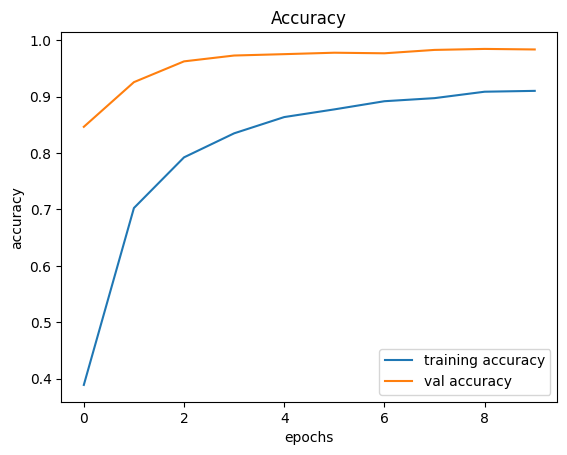

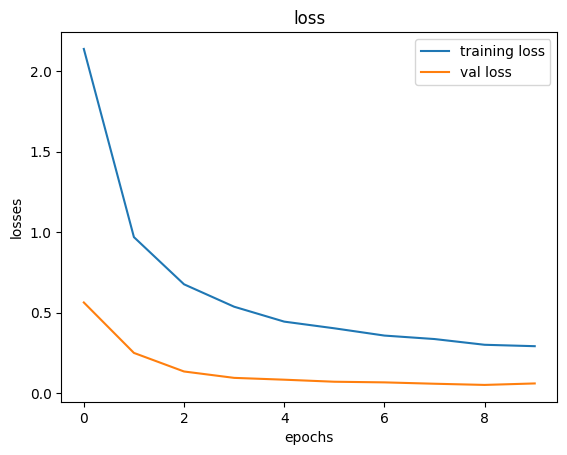

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('loss')
plt.xlabel("epochs")
plt.ylabel('losses')
plt.legend()

In [21]:
from sklearn.metrics import accuracy_score 
import pandas as pd
y_test = pd.read_csv("archive\Test.csv")

In [22]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [28]:
test_data = []
path1 = os.path.join('archive', 'Test')
imgs = os.listdir(path)
for img in imgs:
    image = Image.open(path1 + '\\' + img)
    image = image.resize((30,30))
    test_data.append(np.array(image))
    
X_test = np.array(test_data)

In [29]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [30]:
X_test = np.array(list(map(grayscale, X_test)))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [31]:
pred = mymodel.predict(X_test)
pred = np.argmax(pred, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

395/395 [==============================] - 6s 16ms/step


0.9258907363420428

In [32]:
pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [33]:
mymodel.save('traffic_classifer.h5')

c:\users\hardik chaudhary\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
import tkinter as tk
from tkinter import filedialog 
from tkinter import *
from PIL import ImageTk, Image
import numpy 
from keras.models import load_model
model = load_model('traffic_classifer.h5')
 
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background = '#CDCDCD')

label = Label(top, background ='#CDCDCD', font=('arial', 15 , 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed 
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(1, image.shape[0], image.shape[1], 1)
    #print(image.shape)
    #input_shape =image[0], image[1], 1
    #print(image.shape)
    pred = model.predict([image])
    pred = np.argmax(pred)
    sign = classes[pred+1]
    print(sign)
    label.config(foreground = '#011638', text = sign)
    
def show_classify_button(file_path):
    classify_b = Button(top, text = "Classify Image", command = lambda : classify(file_path),padx=10,pady=5)
    classify_b.configure(background = '#364156', foreground = 'white', font = ('arial', 10,'bold'))
    classify_b.place(relx = 0.79 , rely = 0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/ 2.25), (top.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image = im)
        sign_image.image = im
        label.configure(text = '')
        show_classify_button(file_path)
    except:
        pass
    

upload = Button(top, text = "Upload an Image", command = upload_image, padx = 10, pady = 5)
upload.configure(background = '#364156', foreground = 'white', font = ('arial', 10, 'bold'))

upload.pack(side = BOTTOM, pady = 50)
sign_image.pack(side = BOTTOM, expand = True)
label.pack(side = BOTTOM, expand = True)
heading = Label(top, text = "Know Your Traffic Sign", pady = 20, font = ('arial', 20, 'bold'))
heading.configure(background = '#CDCDCD', foreground = '#364156')
heading.pack()
top.mainloop()


1/1 [==============================] - 0s 90ms/step
Speed limit (30km/h)
